This code is for M_PL_50 (Matrix Pollinization 30x20)

In [1]:
#Libraries needed
import igraph as ig
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import statistics

In [2]:
########## Program #########
dir = os.getcwd()  # Folder where the program is
Experiment = 'M_PL_50' #Name of the experiment
beta = 0.002 # Values of beta, in this case 0.01 as this value as forced
Normalized = 0.75 #Value to normalize the matrix

In [3]:
MGL = [] #Matrix from the databases, narmalized
MCL = [] # Matrix from the databases, normalized and put in the form of (6) matrix from the paper 
VL = [] # Vector with the number of vertex of each web
D1 = [] # Vector with the dimension 1 of each web
D2 = [] # Equal to D1 but with dimension 2
databases = [] # Vector with the name of the databases to be used
MatrixGraphs = [] # Vector with graph matrix 
D1 = [] # Vector with dimension 1
D2 =[] # Vector with dimension 2
VL= [] # Vector with number of vertex

In [4]:
databases_dir = '/databases'  # Directory of the databases

In [5]:
files = os.listdir(dir + databases_dir)

In [6]:
#First way, it writes as ['item',..]
f = open('filedata.txt', 'w') # .txt where put the list with the names of the databases
f.write(str(files)) # Write the list
f.close() # Close the file

In [7]:
#Second way, it writes as a list (as in original program)
with open ('filedata.txt', 'w') as f:
    for item in files:
        f.write("%s\n" % item)
    f.close()

In [8]:
# This rutine allows to read the csv and put into a matrix using pandas
files_db = []
for db in files: 
    data = pd.read_csv(dir + databases_dir + '/' + db, header = None) # Row data
    rows = data.shape[0] # Size of the first set of species
    cols = data.shape[1] # Size of the second set of species
    dim1 = rows
    dim2 = cols
    if (dim1>19 and dim2>29) or (dim1>29 and dim2>19):
        if (dim1<=dim2):
            dim1 = 20
            filas = 20
            dim2 = 30
            cols = 30
        else:
            dim1 = 30
            filas = 30
            dim2 = 20
            cols = 20
        files_db.append(db)
        vertexs = dim1 + dim2
        databases.append(db) #Inclusion of the databases in a list to know which databases are being used
        # Normalizing and creation of the graph matrix
        #zero_data = np.zeros(shape=(len(data),len(data)))
        zero_data = np.ones(shape=(vertexs,vertexs))
        MatrixGraphP = pd.DataFrame(zero_data)
        #Create the matrix
        # Part of the cooperation
        for i in range(dim1):
            for j in range(dim1, vertexs):
                MatrixGraphP.loc[i,j] = data.loc[i,j-dim1] #This part is what is in the database 
                MatrixGraphP.loc[j,i] = data.loc[i,j-dim1] #This part is what is in the database
        
        sumatory = [] #To calulte the sum of the rows
        for index, row in MatrixGraphP.iterrows():
            sumatory.append(row.sum())
        Maxi = max(sumatory)
        MatrixGraphP = Normalized*MatrixGraphP/Maxi
        # Part of the competition
        for i in range(dim1):
            for j in range(dim1):
                MatrixGraphP.loc[i,j] = beta
        
        for i in range(vertexs-dim2, vertexs):
            for j in range(vertexs-dim2, vertexs):
                MatrixGraphP.loc[i,j] = beta
                
                #Diagonal
        for i in range(vertexs):
                MatrixGraphP.loc[i,i] = 0
    
        #Gathering all the data
        MatrixGraphs.append(MatrixGraphP)
        D1.append(dim1)
        D2.append(dim2)
        VL.append(vertexs)
    
        
    
        

In [9]:
#This is just for programing erase after done
#files = ['MSD004']

In [10]:
 #MatrixGraphP

In [11]:
for matrix in MatrixGraphs:
    MGL.append(matrix.copy())


In [12]:
# Montecarlo matrix
for matrix in MGL:
    MCL.append(matrix.copy())

for matrix in range(len(MCL)):
    # Gamma value are negatives
    for i in range(D1[matrix], VL[matrix]):
        for j in range(D1[matrix]):
            MCL[matrix].loc[i,j] = - MCL[matrix].loc[i,j]
            MCL[matrix].loc[j,i] = - MCL[matrix].loc[j,i]
    #Diagonal equal to 1
    for i in range( VL[matrix]):
        MCL[matrix].loc[i,i] = 1
        
    

In [13]:
#MGL[0]

In [14]:
# Calculating mean and standard deviation
Mean = []
Std = []
for Matrix in MCL:
    Mean.append(-Matrix[Matrix <= 0].mean().mean()*2)
    Std.append(Matrix[Matrix <= 0].std().std()*2)
Mean_Total = statistics.mean(Mean)
Std_Total = statistics.mean(Std)
#Mean, Std, 
Mean_Total, Std_Total

(0.004280526105861047, 0.024323779868535955)

In [15]:
Elements = []
for Matrix in MCL:
    Elements.append(Matrix[(Matrix>0.0001) | (Matrix<-0.0001)].count().sum()/2-(30*20))
Elements_mean=statistics.mean(Elements)
Elements_Std=statistics.stdev(Elements)
#Elements, 
Elements_mean, Elements_Std

(93.78571428571429, 28.61999992320747)

In [16]:
# Generating the matrix to use in CgrilliJR
for i in range(0,len(MCL)): 
    textfile = open("databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "w")
    Matrix = MCL[i].values.flatten()
    for element in Matrix:
        textfile.write(str(element) + "\n")
    textfile.close()

In [17]:
## Calling the program to calculate the structural stability
#os.remove("Out_"+Experiment+".txt") if os.path.exists("Out_"+Experiment+".txt") else False
#for i in range(0,len(databases)):
#    print(databases[i])
#    matrix = open("databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "r")
#    # subprocess.run(["./StructuralStab", str(VL[i]), "databases_flat/"+databases[i]+"_In.lst", databases[i]+"_Out.txt", "-1"], capture_output=False)
#    subprocess.run(["./StructuralStab", str(VL[i]), "databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "Out_"+Experiment+".txt", "-1"], capture_output=False)
#    print(databases[i])

In [18]:
# Reading the result
result = pd.read_csv("Out_"+Experiment+".txt",sep = " ", header = None)

In [19]:
List_Stab = result.to_numpy().transpose().tolist()

In [20]:
#List_Stab[2]

In [21]:
# Calculate mean grade and gamma minus beta
##Mean Grade
meangrade = []
for matrix in MGL:
    matrix_abs = matrix.copy()
    matrix_abs = matrix_abs.abs()
    meangrade_matrix = matrix_abs.sum().sum()/(2*matrix.shape[0])
    meangrade.append(meangrade_matrix)
    
## Gamma minus Beta
gammaminusbeta = []
for matrix in MCL:
    gammaminusbeta_matrix = (-matrix.sum().sum() + matrix.shape[0])/(2*matrix.shape[0])
    gammaminusbeta.append(gammaminusbeta_matrix)
    

In [22]:
#meangrade

In [23]:
#gammaminusbeta

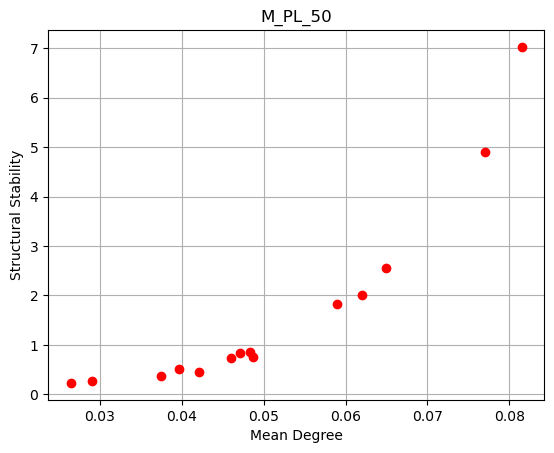

In [24]:
# Generating Plots of meangrade
plt.plot(meangrade, List_Stab[2], "ro")
plt.xlabel('Mean Degree')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

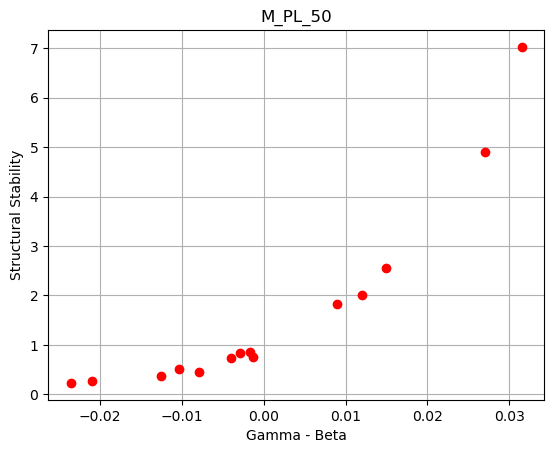

In [25]:
# Generating Plots of gammaminusbeta
plt.plot(gammaminusbeta, List_Stab[2], "ro")
plt.xlabel('Gamma - Beta')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

In [26]:
# Calculate sum of cooperation and competition
sum_coop = [] # Sum of cooperation
sum_comp = [] # Sum of competition
for matrix in MCL:
    suma = (matrix.values).tolist()
    sum_comp_rel = []
    sum_coop_rel = []
    for vector in suma:
        sum_comp_rel.append(sum([comp for comp in vector if (comp >0 and comp != 1.0)]))
        sum_coop_rel.append(sum([coop for coop in vector if coop <=0]))
    sum_comp.append(sum(sum_comp_rel)/(2*matrix.shape[0]))
    sum_coop.append(-sum(sum_coop_rel)/(2*matrix.shape[0]))

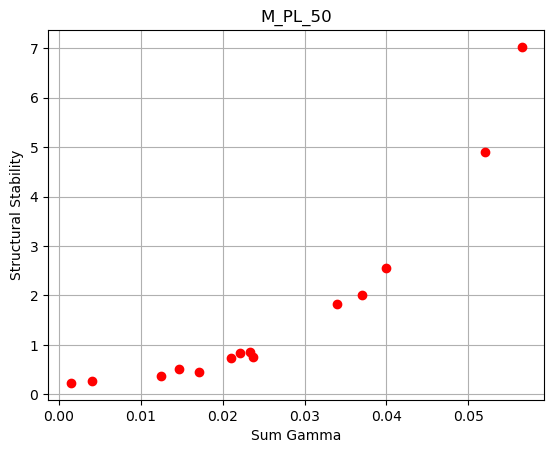

In [27]:
# Generating Plots of sum of gamma
plt.plot(sum_coop, List_Stab[2], "ro")
plt.xlabel('Sum Gamma')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

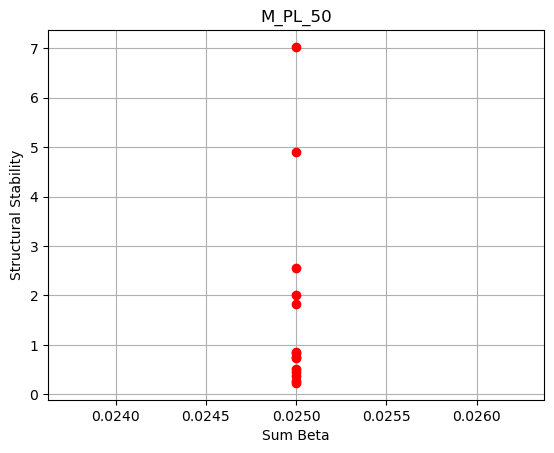

In [28]:
# Generating Plots of sum of gamma
plt.plot(sum_comp, List_Stab[2], "ro")
plt.xlabel('Sum Beta')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

In [29]:
# Modularity review
Modul_eig = []
Modul_opt = []
Modul_greedy = []
for i in range(0,len(MGL)):
    print(i)
    Graph = MGL[i].values
    g = ig.Graph.Weighted_Adjacency((Graph).tolist(), mode = 'undirected')
    communities_eig = g.community_leading_eigenvector(weights = g.es['weight'])
    communities_opt = g.community_Óptimal_modularity(weights = g.es['weight'])
    communities_greedy = g.community_fastgreedy(weights = g.es['weight']).as_clustering()
    #communities = g.community_leiden(resolution=0.60)
    #communities = g.community_edge_betweenness().as_clustering()
    modula_eig = g.modularity(communities_eig)
    modula_opt = g.modularity(communities_opt)
    modula_greedy = g.modularity(communities_greedy)
    Modul_eig.append(modula_eig)
    Modul_opt.append(modula_opt)
    Modul_greedy.append(modula_greedy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


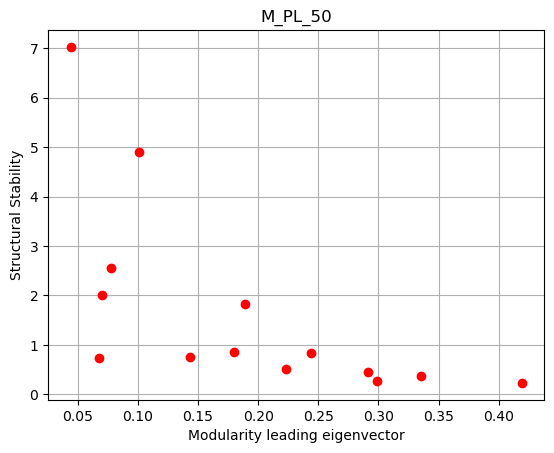

In [30]:
# Generating plots modularity
plt.plot(Modul_eig, List_Stab[2], "ro")
plt.xlabel('Modularity leading eigenvector')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

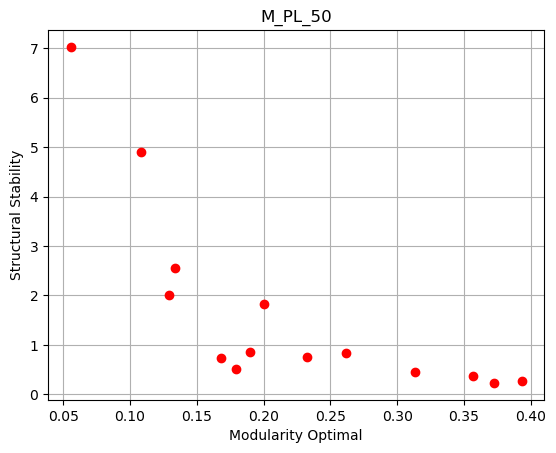

In [31]:
# Generating plots modularity
plt.plot(Modul_opt, List_Stab[2], "ro")
plt.xlabel('Modularity Óptimal')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

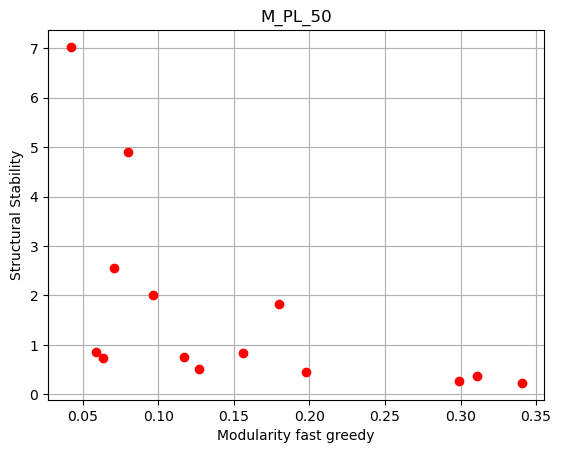

In [32]:
# Generating plots modularity
plt.plot(Modul_greedy, List_Stab[2], "ro")
plt.xlabel('Modularity fast greedy')
plt.ylabel('Structural Stability')
plt.title(Experiment)
plt.grid(True)
plt.show()

In [33]:
## Save the results in a CSV to compare
data = np.transpose(np.array([databases, meangrade, gammaminusbeta, sum_coop, sum_comp, 
                              Modul_eig, Modul_opt, Modul_greedy, List_Stab[2]]))

In [34]:
df_data = pd.DataFrame(data, columns = ['database','meangrade', 'gammaminusbeta', 'sum_coop', 'sum_comp',
                                        'Modularity_eig','Modularity_opt', 'Modularity_greedy','Struc_Stab'])

In [35]:
#df_data

In [36]:
df_data.to_csv('Result_CSV/'+Experiment+'.csv', index = False)